In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [2]:
CATEGORIES = [str(i) for i in range(10)]
PATH = "C://Users/nguye/Desktop/VanAn/SUDOKU/Char74k/English/Fnt/"

In [3]:
training_data = []
for category in CATEGORIES:
    path = os.path.join(PATH, "Sample00"+category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        resized_array = cv2.resize(image_array, (64,64))
        _ , resized_array = cv2.threshold(resized_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        training_data.append([resized_array,class_num])

len(training_data)

10160

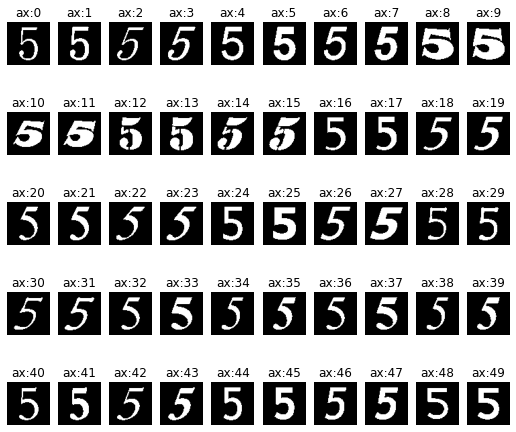

In [36]:


fig = plt.figure(figsize=(9, 8))
rows, columns = 5, 10
ax = []
for i in range(columns*rows):
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(training_data[6000+i][0], cmap='gray')
    plt.axis("off")

plt.show()

In [4]:
X = []
y = []
for data, label in training_data:
    X.append(data)
    y.append(label)
X = np.array(X).reshape(-1,4096)

In [5]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2)
print(len(X_train), len(X_test))

8128 2032


In [6]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [7]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.9822834645669292

In [8]:
path_su = "C://Users/nguye/Desktop/VanAn/SUDOKU/Image/number/img0"

In [9]:
training_sudoku = []
for i in range(9):
        image_sudoku = cv2.imread(path_su + str(i) + ".png", cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(image_sudoku, (64,64))
        #  _ , resized_array = cv2.threshold(resized_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        training_sudoku.append(img)


In [10]:
training_sudoku = np.array(training_sudoku).reshape(-1,4096)

In [11]:
y_pred = clf.predict(training_sudoku)
y_pred

array([8, 2, 6, 0, 0, 0, 4, 0, 0])

In [12]:
filename = 'C://Users/nguye/Desktop/VanAn/SUDOKU/model/chars74k_2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [13]:
loaded_model = pickle.load(open(filename, 'rb'))

In [14]:
y_pred = loaded_model.predict(training_sudoku)

In [15]:
y_pred

array([8, 2, 6, 0, 0, 0, 4, 0, 0])